# Homework 04
## Multiple variable linear regression by 20175437 신준섭

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv

## 1. Input points
* ### Load train datas from `data_train.csv`
$$\{ (x^{(i)}, y^{(i)}, z^{(i)}, h^{(i)} ) \}$$

* ### Load test datas from `data_test.csv`
$$\{ (x^{(i)}, y^{(i)}, z^{(i)}, h^{(i)} ) \}$$

In [2]:
# read data points from .cvs files
def read_datafiles(filename):
    datas, target = [], []
    with open(filename, newline='') as the_file:
        reader  = csv.reader(the_file, delimiter=',')
        for i in reader:
            datas.append([float(1.0), float(i[0]), float(i[1]), float(i[2])])
            target.append([float(i[3])])
    return np.matrix(datas), np.matrix(target)

train_data, train_target = read_datafiles("data_train.csv")
test_data, test_target = read_datafiles("data_test.csv")


## 2. Linear Model
### * Linear model of 3 inputs
$$f_\theta(x, y, z) = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 z$$
$$where, \theta_0, \theta_1, \theta_2, \theta_3 \in \mathbb{R} $$

### * Vector equation form
$$ \Theta = [\theta_0, \theta_1, \theta_2, \theta_3 ]^T $$
$$ \mathbf{x} = [1, x, y, z]^T $$
$$ f(\Theta, \mathbf{x}) =   \mathbf{x}^T \cdot \Theta $$

### * Matrix form
\begin{equation*}
    X = \begin{bmatrix}
        \mathbf{x}_1^T \\
        \cdot \cdot \cdot \\
        \mathbf{x}_m^T
    \end{bmatrix}
\end{equation*}

$$ F = X \cdot \Theta$$

where for $m$ data points,
$$F \in \mathbb{R}^{m \times 1},  X \in \mathbb{R}^{m \times 4}$$

## 3. Objective function

### * The target value for $\mathbf{x}_i$ is $h_i$ so
$$H = [h_1, \cdot \cdot \cdot, h_N]^T$$

### * Scalar representation
$$J(\theta_0, \theta_1, \theta_2, \theta_3) = \frac{1}{2 m} \sum_{i=1}^m ( \theta_0 + \theta_1 x^{(i)} + \theta_2 y^{(i)} + \theta_3 z^{(i)} - h^{(i)} )^2$$

### * Matrix representation
$$J(\Theta, \mathbf{x}) = \frac{1}{2m} \sum_{i=1}^{m} [(F - H)^2]_i $$

In [3]:
def getLoss(X, T, H):
    m = H.shape[0]
    return (1.0 / (2.0 * m)) * np.sum(np.square(np.matmul(X, T) - H))

## 4. Gradient Descent
- $\theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)})$
- $\theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)}) x^{(i)}$
- $\theta_2^{(t+1)} := \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)}) y^{(i)}$
- $\theta_3^{(t+1)} := \theta_3^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)}) z^{(i)}$

In [4]:
def getGradient(X, T, H):
    m = H.shape[0]
    gradients = np.matrix([[0.0], [0.0], [0.0], [0.0]])
    diff = np.matmul(X, T) - H

    idx = 0
    while idx < X.shape[1]:
        gradients[idx] = (1.0/m) * np.sum(np.multiply(diff, X[:,idx]))
        idx = idx + 1

    return gradients

def gradientDescent(X, T, H, lr = 0.00001):
    grads = getGradient(X, T, H)
    return T - lr * grads

def testConvergence(X, T, H, threshold = 9.0):
    grads = getGradient(X, T, H) 
    # testing convergence by the magnitude of the gradients
    return np.sqrt(np.sum(np.square(grads))) < threshold

## 5. Training & Testing

In [23]:
thetas = np.matrix([[0.0], [0.0], [0.0], [0.0]])

train_losses = [] # recording the train process
test_losses = [] # recording the testset performence
theta0_records = [] # recording parameters 
theta1_records = [] # recording parameters 
theta2_records = [] # recording parameters 
theta3_records = [] # recording parameters 

iterations = 0

while testConvergence(train_data, thetas, train_target) == False:
    thetas = gradientDescent(train_data, thetas, train_target)
    theta0_records.append(thetas[0].tolist()[0][0])
    theta1_records.append(thetas[1].tolist()[0][0])
    theta2_records.append(thetas[2].tolist()[0][0])
    theta3_records.append(thetas[3].tolist()[0][0])
    train_losses.append(getLoss(train_data, thetas, train_target))
    test_losses.append(getLoss(test_data, thetas, test_target))
    iterations = iterations + 1

print(theta0_records[-10:-1])

[-0.016223671965563423, -0.016227256334491198, -0.01623084058025312, -0.01623442470285927, -0.016238008702319742, -0.016241592578644635, -0.016245176331844056, -0.01624875996192812, -0.01625234346890695]


## 6. Plotting the results

### 1. Plot the estimated parameters using the training dataset

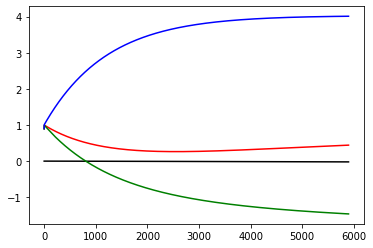

In [24]:
iter_x = list(range(0, iterations))

plt.plot(iter_x, theta0_records, color = 'black')
plt.plot(iter_x, theta1_records, color = 'red')
plt.plot(iter_x, theta2_records, color = 'green')
plt.plot(iter_x, theta3_records, color = 'blue')


plt.show()

### 2. Plot the training error using the training dataset

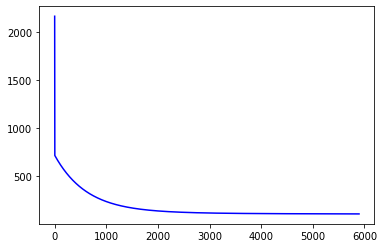

In [25]:
plt.plot(iter_x, train_losses, color='blue')

plt.show()

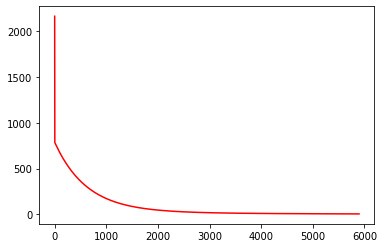

In [26]:
plt.plot(iter_x, test_losses, color='red')

plt.show()